In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
print(tf.__version__)

2.3.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
mnist_fashion = keras.datasets.fashion_mnist

In [57]:
 (x_train,y_train),(x_test,y_test) = mnist_fashion.load_data()

In [58]:
x_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
np.max(x_train),np.min(x_train),np.mean(x_train)

(255, 0, 72.94035223214286)

In [12]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
class_names =['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [15]:
#Data exploration

In [16]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

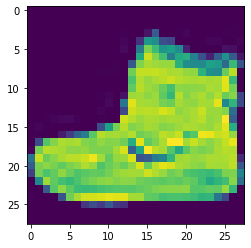

In [17]:
plt.figure()
plt.imshow(x_train[0])

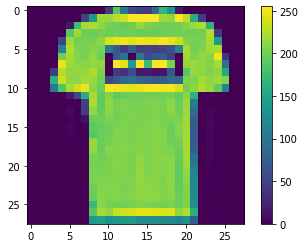

In [18]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [19]:
# Normalization of data
# In between 0 and 1
x_train,x_test = x_train/255,x_test/255

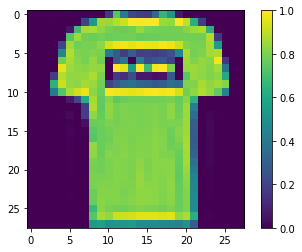

In [20]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [21]:
np.max(x_train)

1.0

In [22]:
# Building machine learning model

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [24]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Model compilation

In [54]:
# loss function
# optimizer
# metrics

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
x_train.shape

(60000, 28, 28)

In [61]:
# Training model
model.fit(x_train,y_train,epochs =20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2791 - accuracy: 0.7583
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2712 - accuracy: 0.7678
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3593 - accuracy: 0.7703
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1067 - accuracy: 0.7753
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2198 - accuracy: 0.7861
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0479 - accuracy: 0.7832
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9964 - accuracy: 0.7851
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0912 - accuracy: 0.7829
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9068 - accuracy: 0.7917
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.918

In [33]:
# Evaluating model
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8822


In [34]:
# Checking accuracy score
from sklearn.metrics import accuracy_score

In [35]:
y_predict = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [36]:
accuracy_score(y_test,y_predict)

0.8822

In [42]:
y_predict = model.predict(x_test)

In [43]:
y_predict

array([[1.8306024e-09, 1.2653048e-18, 1.1799861e-21, ..., 6.3715350e-05,
        6.6141123e-14, 9.9993622e-01],
       [1.1363328e-05, 1.6712020e-23, 9.9953961e-01, ..., 7.1533800e-28,
        5.0105766e-14, 8.6314982e-18],
       [2.5902234e-15, 1.0000000e+00, 7.4742560e-20, ..., 1.9010041e-33,
        1.1048172e-19, 5.4120343e-31],
       ...,
       [8.9737595e-09, 2.3496112e-19, 3.2883567e-11, ..., 1.6582183e-14,
        9.9999619e-01, 4.3308440e-24],
       [4.1755712e-14, 9.9999797e-01, 4.2573262e-14, ..., 1.8305126e-17,
        3.9982347e-11, 8.5418004e-15],
       [1.6028049e-11, 3.7281969e-15, 3.8409889e-13, ..., 1.1288262e-06,
        8.9173762e-09, 5.7942612e-10]], dtype=float32)

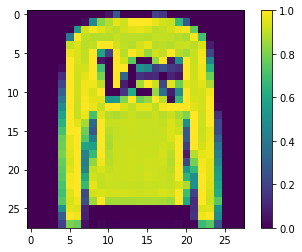

In [44]:
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()

In [48]:
# Checking x_test[1] prediction by model
# It's prediction will be y_predict[1]
# Returns as pullover

np.argmax(y_predict[1])

2

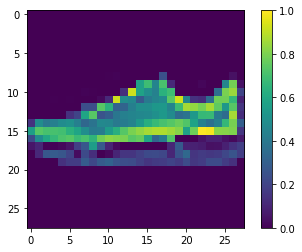

In [49]:
plt.figure()
plt.imshow(x_test[9])
plt.colorbar()

In [50]:
np.argmax(y_predict[9])

7

In [51]:
from sklearn.metrics import confusion_matrix

In [56]:
#confusion_matrix(y_test,y_predict)